In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
# --- НАЛАШТУВАННЯ СТИЛЮ ---
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (11, 7) # Трохи збільшив розмір для читабельності
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [20]:
COLOR_TOTAL = '#2c3e50'   # Темно-сірий
COLOR_SERVER = '#3498db'  # Синій
COLOR_CLIENT = '#e74c3c'  # Червоний
COLOR_MIN = '#27ae60'     # Зелений
COLOR_MAX = '#c0392b'     # Темно-червоний

In [21]:
# Функція-помічник для анотацій
def add_labels(ax, x_vals, y_vals, color, offset=(0, 10)):
    for x, y in zip(x_vals, y_vals):
        ax.annotate(f'{y:.1f}s', (x, y), textcoords="offset points", xytext=offset, 
                    ha='center', fontsize=10, color='black', weight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.8))

## Рисунок 7.1 – Графік залежності часу базової взаємодії від навантаження

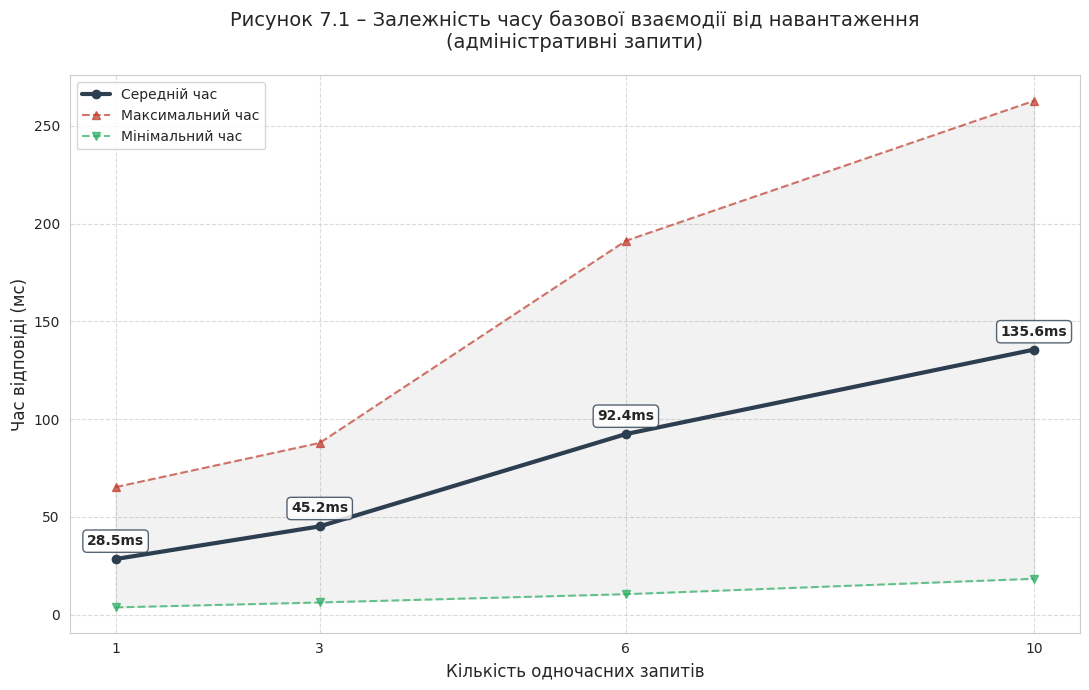

In [ ]:
# Дані (Таблиця 7.1)
users = [1, 3, 6, 10]
min_times = [3.77, 6.28, 10.52, 18.40]
max_times = [65.29, 87.88, 191.25, 262.83]
avg_times = [28.5, 45.2, 92.4, 135.6]

fig, ax = plt.subplots()

ax.plot(users, avg_times, marker='o', linewidth=3, color=COLOR_TOTAL, label='Середній час')
ax.plot(users, max_times, marker='^', linestyle='--', color=COLOR_MAX, label='Максимальний час', alpha=0.7)
ax.plot(users, min_times, marker='v', linestyle='--', color=COLOR_MIN, label='Мінімальний час', alpha=0.7)
ax.fill_between(users, min_times, max_times, color='gray', alpha=0.1)

ax.set_title('Рисунок 7.1 – Залежність часу базової взаємодії від навантаження\n(адміністративні запити)', pad=20)
ax.set_xlabel('Кількість одночасних запитів')
ax.set_ylabel('Час відповіді (мс)')
ax.set_xticks(users)
ax.legend(loc='upper left')
ax.grid(True, linestyle='--', alpha=0.7)

# Анотації (тут значення в мс, тому f'{y:.1f}ms')
for x, y in zip(users, avg_times):
    ax.annotate(f'{y:.1f}ms', (x, y), textcoords="offset points", xytext=(0,10), 
                ha='center', fontsize=10, weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=COLOR_TOTAL, alpha=0.8))

plt.tight_layout()
plt.show()

## Рисунок 7.2 – Графік залежності часу виконання від довжини маршруту

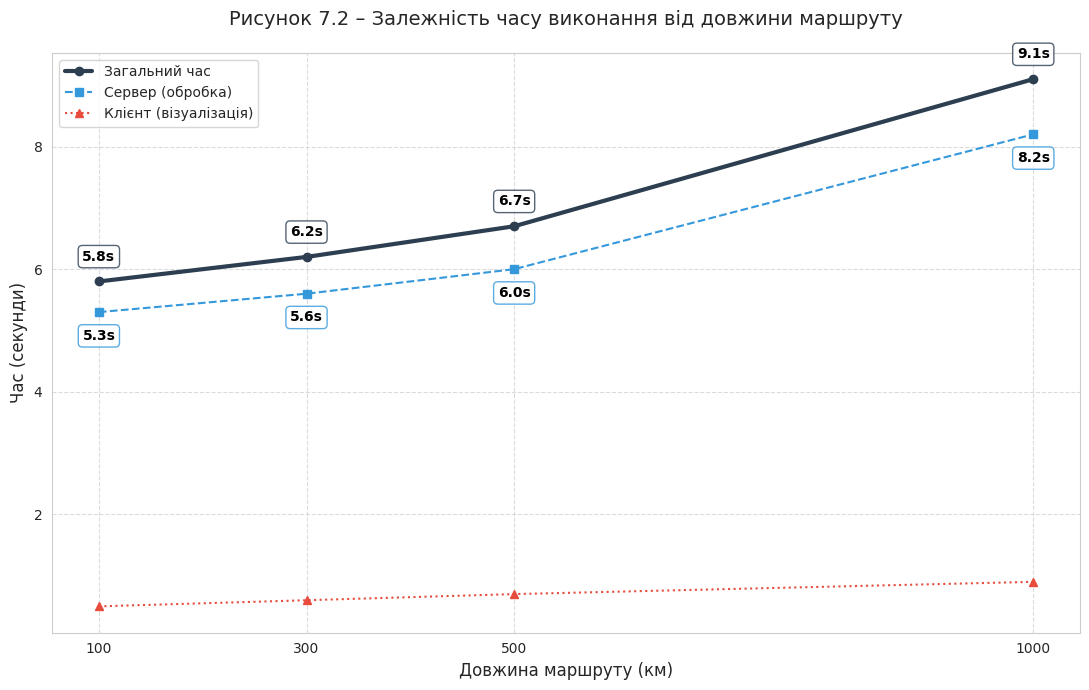

In [23]:
# Дані (Таблиця 7.2)
distances = [100, 300, 500, 1000]
server_t_dist = [5.3, 5.6, 6.0, 8.2]
client_t_dist = [0.5, 0.6, 0.7, 0.9]
total_t_dist = np.array(server_t_dist) + np.array(client_t_dist)

fig, ax = plt.subplots()

ax.plot(distances, total_t_dist, marker='o', linewidth=3, color=COLOR_TOTAL, label='Загальний час')
ax.plot(distances, server_t_dist, marker='s', linestyle='--', color=COLOR_SERVER, label='Сервер (обробка)')
ax.plot(distances, client_t_dist, marker='^', linestyle=':', color=COLOR_CLIENT, label='Клієнт (візуалізація)')

ax.set_title('Рисунок 7.2 – Залежність часу виконання від довжини маршруту', pad=20)
ax.set_xlabel('Довжина маршруту (км)')
ax.set_ylabel('Час (секунди)')
ax.set_xticks(distances)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

add_labels(ax, distances, total_t_dist, COLOR_TOTAL, offset=(0, 15))
add_labels(ax, distances, server_t_dist, COLOR_SERVER, offset=(0, -20))

plt.tight_layout()
plt.show()

## Рисунок 7.3 – Графік впливу проміжних точок на швидкодію

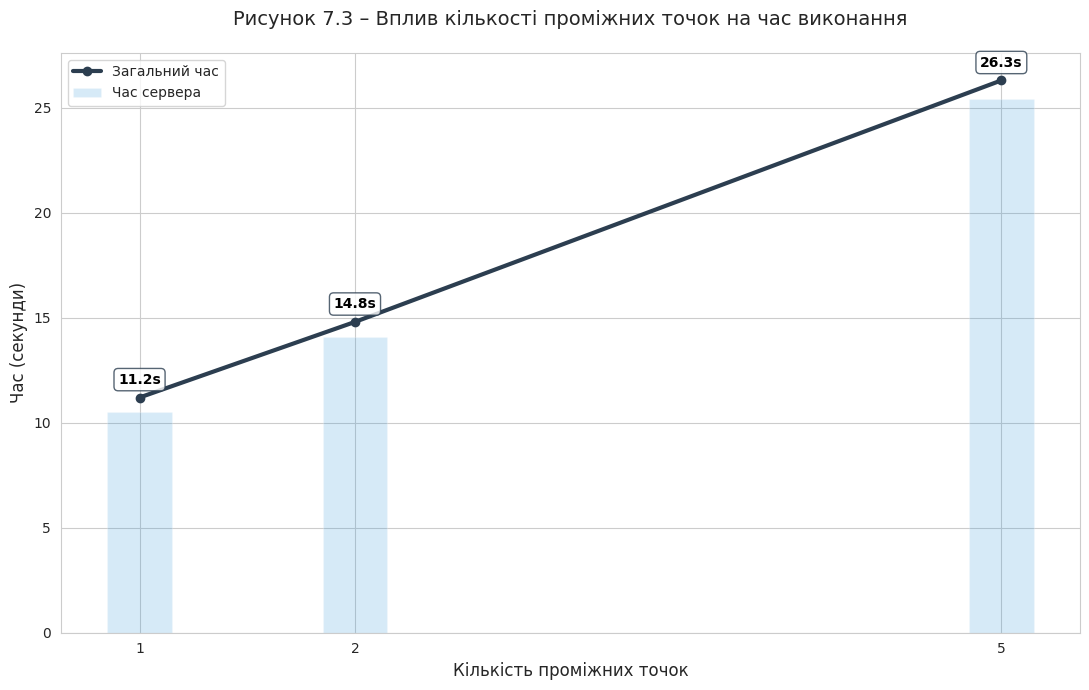

In [24]:
points = [1, 2, 5]
server_t_pts = [10.5, 14.1, 25.4]
client_t_pts = [0.7, 0.7, 0.9]
total_t_pts = np.array(server_t_pts) + np.array(client_t_pts)

fig, ax = plt.subplots()

ax.plot(points, total_t_pts, marker='o', linewidth=3, color=COLOR_TOTAL, label='Загальний час')
ax.bar(points, server_t_pts, width=0.3, color=COLOR_SERVER, alpha=0.2, label='Час сервера')

ax.set_title('Рисунок 7.3 – Вплив кількості проміжних точок на час виконання', pad=20)
ax.set_xlabel('Кількість проміжних точок')
ax.set_ylabel('Час (секунди)')
ax.set_xticks(points)
ax.legend()

add_labels(ax, points, total_t_pts, COLOR_TOTAL)

plt.tight_layout()
plt.show()

## Рисунок 7.4 – Графік залежності часу від кількості загроз

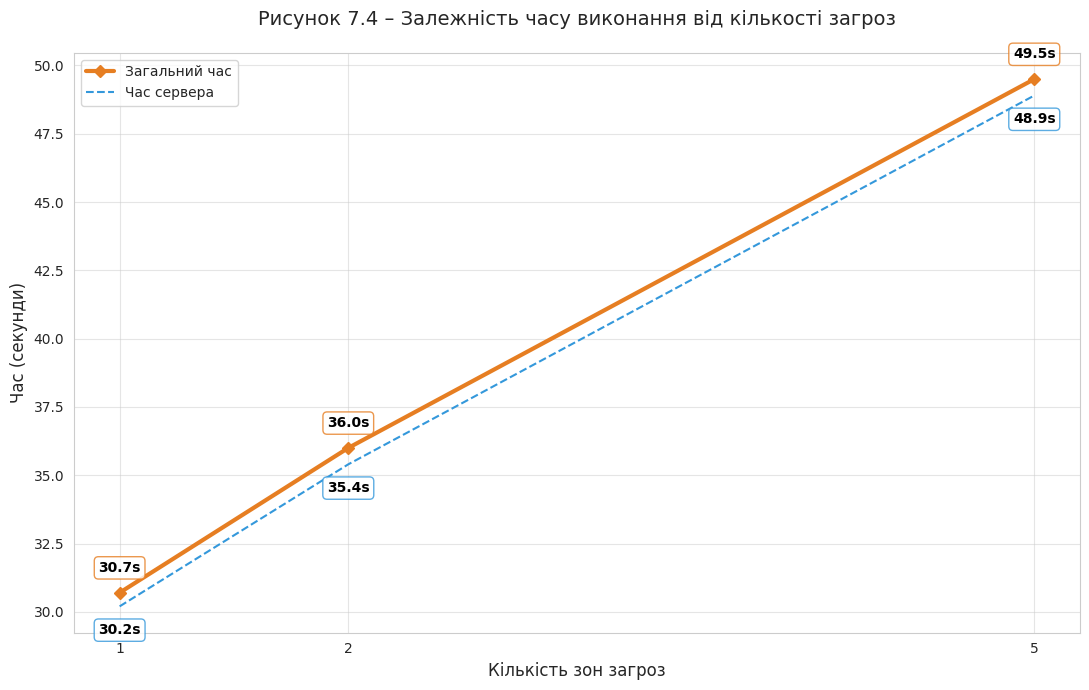

In [25]:
threats = [1, 2, 5]
server_t_thr = [30.2, 35.4, 48.9]
client_t_thr = [0.5, 0.6, 0.6]
total_t_thr = np.array(server_t_thr) + np.array(client_t_thr)

fig, ax = plt.subplots()

ax.plot(threats, total_t_thr, marker='D', linewidth=3, color='#e67e22', label='Загальний час')
ax.plot(threats, server_t_thr, linestyle='--', color=COLOR_SERVER, label='Час сервера')

ax.set_title('Рисунок 7.4 – Залежність часу виконання від кількості загроз', pad=20)
ax.set_xlabel('Кількість зон загроз')
ax.set_ylabel('Час (секунди)')
ax.set_xticks(threats)
ax.legend()
ax.grid(True, alpha=0.5)

add_labels(ax, threats, total_t_thr, '#e67e22', offset=(0, 15))
add_labels(ax, threats, server_t_thr, COLOR_SERVER, offset=(0, -20))

plt.tight_layout()
plt.show()

## Рисунок 7.5 – Гістограма часу виконання типових сценаріїв

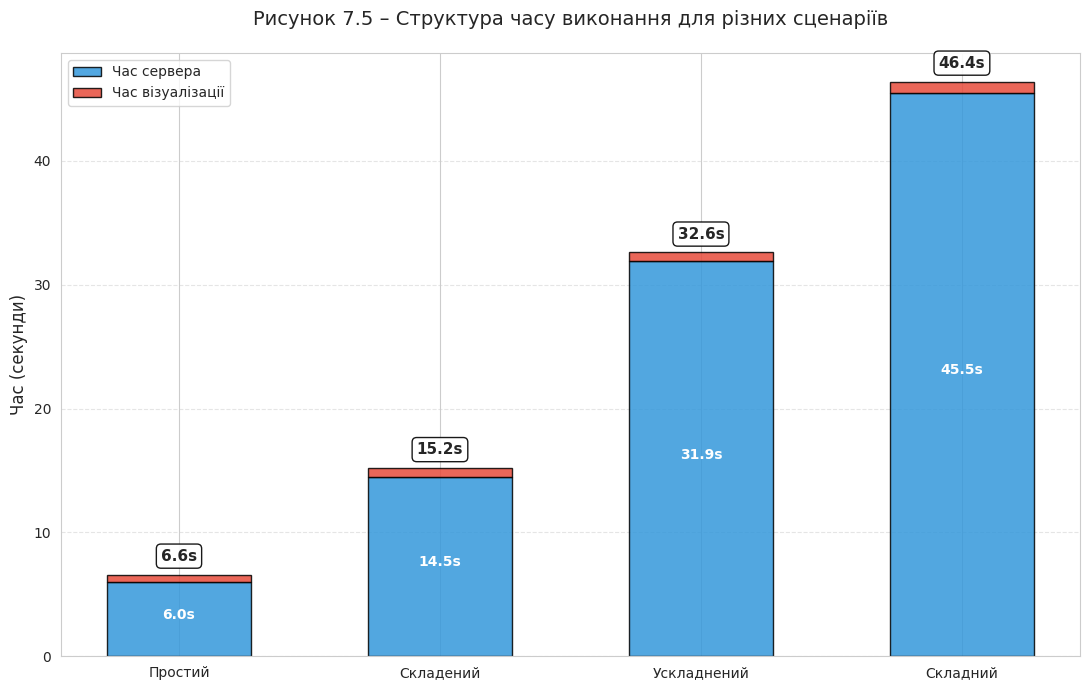

In [26]:
scenarios = ['Простий', 'Складений', 'Ускладнений', 'Складний']
server_sc = [6.0, 14.5, 31.9, 45.5]
client_sc = [0.6, 0.7, 0.7, 0.9]

fig, ax = plt.subplots()
x = np.arange(len(scenarios))
width = 0.55

p1 = ax.bar(x, server_sc, width, label='Час сервера', color=COLOR_SERVER, edgecolor='black', alpha=0.85)
p2 = ax.bar(x, client_sc, width, bottom=server_sc, label='Час візуалізації', color=COLOR_CLIENT, edgecolor='black', alpha=0.85)

ax.set_title('Рисунок 7.5 – Структура часу виконання для різних сценаріїв', pad=20)
ax.set_ylabel('Час (секунди)')
ax.set_xticks(x)
ax.set_xticklabels(scenarios)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Додавання підписів (загальний час зверху)
for i, (s, c) in enumerate(zip(server_sc, client_sc)):
    total = s + c
    ax.annotate(f'{total:.1f}s', (i, total), textcoords="offset points", xytext=(0,10), 
                ha='center', fontsize=11, weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', alpha=0.9))
    
    # Підпис сервера всередині
    if s > 5:
        ax.text(i, s/2, f'{s:.1f}s', ha='center', color='white', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

## Рисунок 7.6 – Графік залежності часу обробки складного маршруту від навантаження

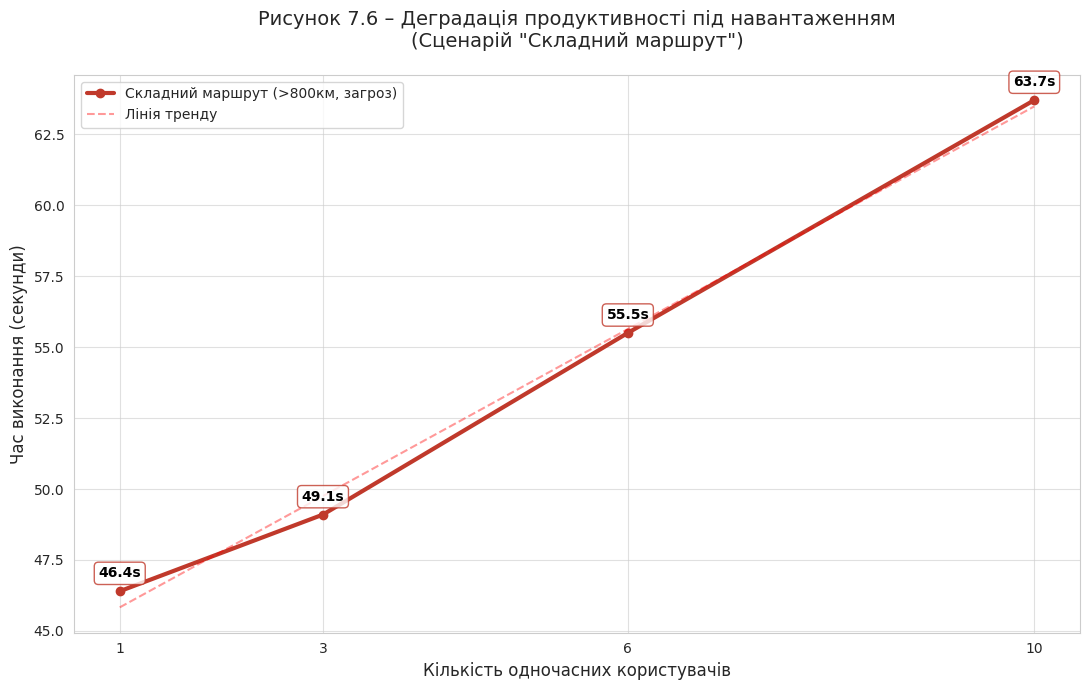

In [27]:
load_users = [1, 3, 6, 10]
server_load = [45.5, 48.2, 54.6, 62.8]
client_load = [0.9, 0.9, 0.9, 0.9]
total_load = np.array(server_load) + np.array(client_load)

fig, ax = plt.subplots()

ax.plot(load_users, total_load, marker='o', linewidth=3, color='#c0392b', label='Складний маршрут (>800км, загроз)')

# Лінія тренду
z = np.polyfit(load_users, total_load, 1)
p = np.poly1d(z)
ax.plot(load_users, p(load_users), "r--", alpha=0.4, label='Лінія тренду')

ax.set_title('Рисунок 7.6 – Деградація продуктивності під навантаженням\n(Сценарій "Складний маршрут")', pad=20)
ax.set_xlabel('Кількість одночасних користувачів')
ax.set_ylabel('Час виконання (секунди)')
ax.set_xticks(load_users)
ax.legend()
ax.grid(True, linestyle='-', alpha=0.6)

add_labels(ax, load_users, total_load, '#c0392b')

plt.tight_layout()
plt.show()